# Import libraries and Read data

In [1]:
import pandas as pd
import numpy as np

import matplotlib 
matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13) 

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import relfreq

In [2]:
df = pd.read_csv('../data/billboard-lyrics-spotify.csv')

In [3]:
df.drop(columns=['artist_base', 'song'], inplace=True)
df.rename(columns={'artist_clean': 'artist_base', 'song_clean': 'song'}, inplace=True)

In [4]:
df.head()

,artist_all,rank,year,artist_featured,song,artist_base,lyrics,danceability,energy,key,...,tempo,time_signature,popularity,explicit,duration_min,num_words,words_per_sec,num_uniq_words,decade,uniq_ratio
0,percy faith,1,1960,NaN,theme from a summer place,percy faith,theres a summer place where it may rain or sto...,0.213,0.3240,9.0,...,181.746,3.0,54.0,False,2.753567,104.0,0.629487,58.0,1960,0.557692
1,jim reeves,2,1960,NaN,hell have to go,jim reeves,put your sweet lips a little closer to the pho...,0.429,0.2830,0.0,...,79.076,3.0,51.0,False,2.373783,152.0,1.067213,69.0,1960,0.453947
2,the everly brothers,3,1960,NaN,cathys clown,the everly brothers,dont want your love any more dont want your k...,0.499,0.7010,7.0,...,120.240,4.0,25.0,False,2.429117,121.0,0.830206,64.0,1960,0.528926
3,johnny preston,4,1960,NaN,running bear,johnny preston,on the bank of the river stood running bear yo...,0.772,0.2970,5.0,...,119.987,4.0,25.0,False,2.636667,220.0,1.390645,89.0,1960,0.404545
4,mark dinning,5,1960,NaN,teen angel,mark dinning,teen angel teen angel teen angel that fateful ...,0.569,0.0638,0.0,...,101.521,4.0,26.0,False,2.664883,109.0,0.681706,73.0,1960,0.669725


# Most popular artist

/tmp/ipykernel_8832/2411589517.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('inferno')


Text(32.5, 1, 'Billboard Year-End\nHot 100 1960-2022')

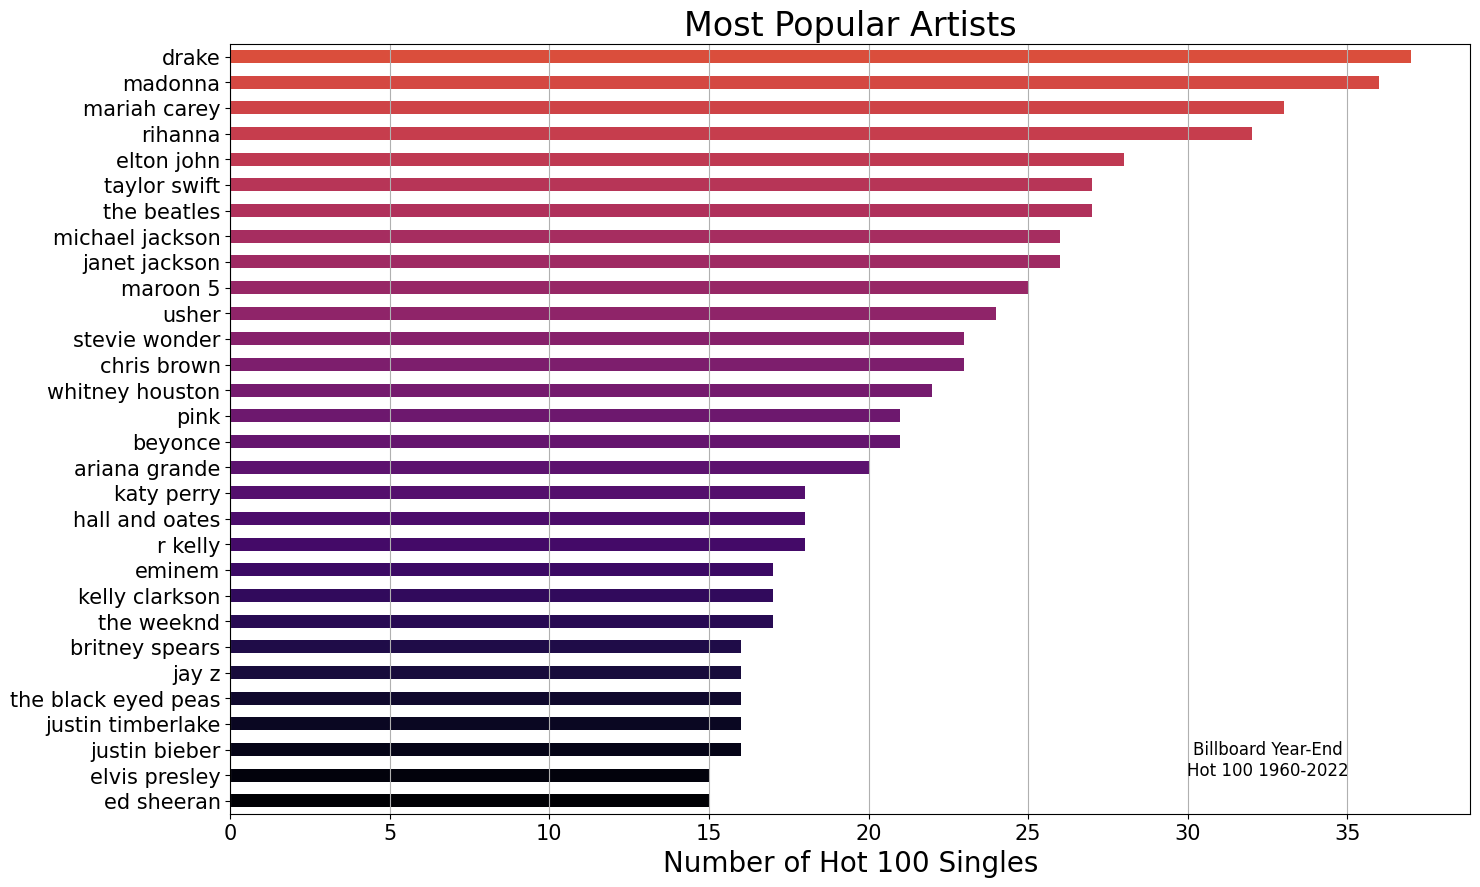

In [5]:
cmap = plt.cm.get_cmap('inferno')
colors = [cmap(x) for x in np.linspace(0, 1, 50)]

ax = df['artist_base'].value_counts().sort_values().tail(30)\
                       .plot.barh(figsize=(16,10), color=colors, fontsize=15)
ax.xaxis.grid(True)
ax.set_xlabel('Number of Hot 100 Singles', fontsize=20)
ax.set_title('Most Popular Artists', fontsize=24)
ax.annotate('Billboard Year-End\nHot 100 1960-2022', xy=(32.5,1),
            fontsize=12, ha='center')

# Artist Career length

In [6]:
# artist longevity is difference between year of newest hit and oldest hit + 1
longevity = df.groupby('artist_base').agg({'year': np.ptp})
longevity.columns = ['longevity']

# keep only 30 artists with longest career spans
longevity = longevity.sort_values(by='longevity', ascending=False).head(30)

# get years for newest and oldest hit
min_max_years = df.groupby('artist_base')['year'].agg([min, max])

# filter billboard song data for only long-career-span artists
timeless = lambda x: True if x in longevity.index else False
timeless_df = df[['artist_base', 'year']][df['artist_base'].apply(timeless)]

/tmp/ipykernel_8832/2191701234.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=timeless_df, x='year', y='artist_base', jitter=True,


Text(2013, 28, 'Billboard Year-End\nHot 100 1960-2022')

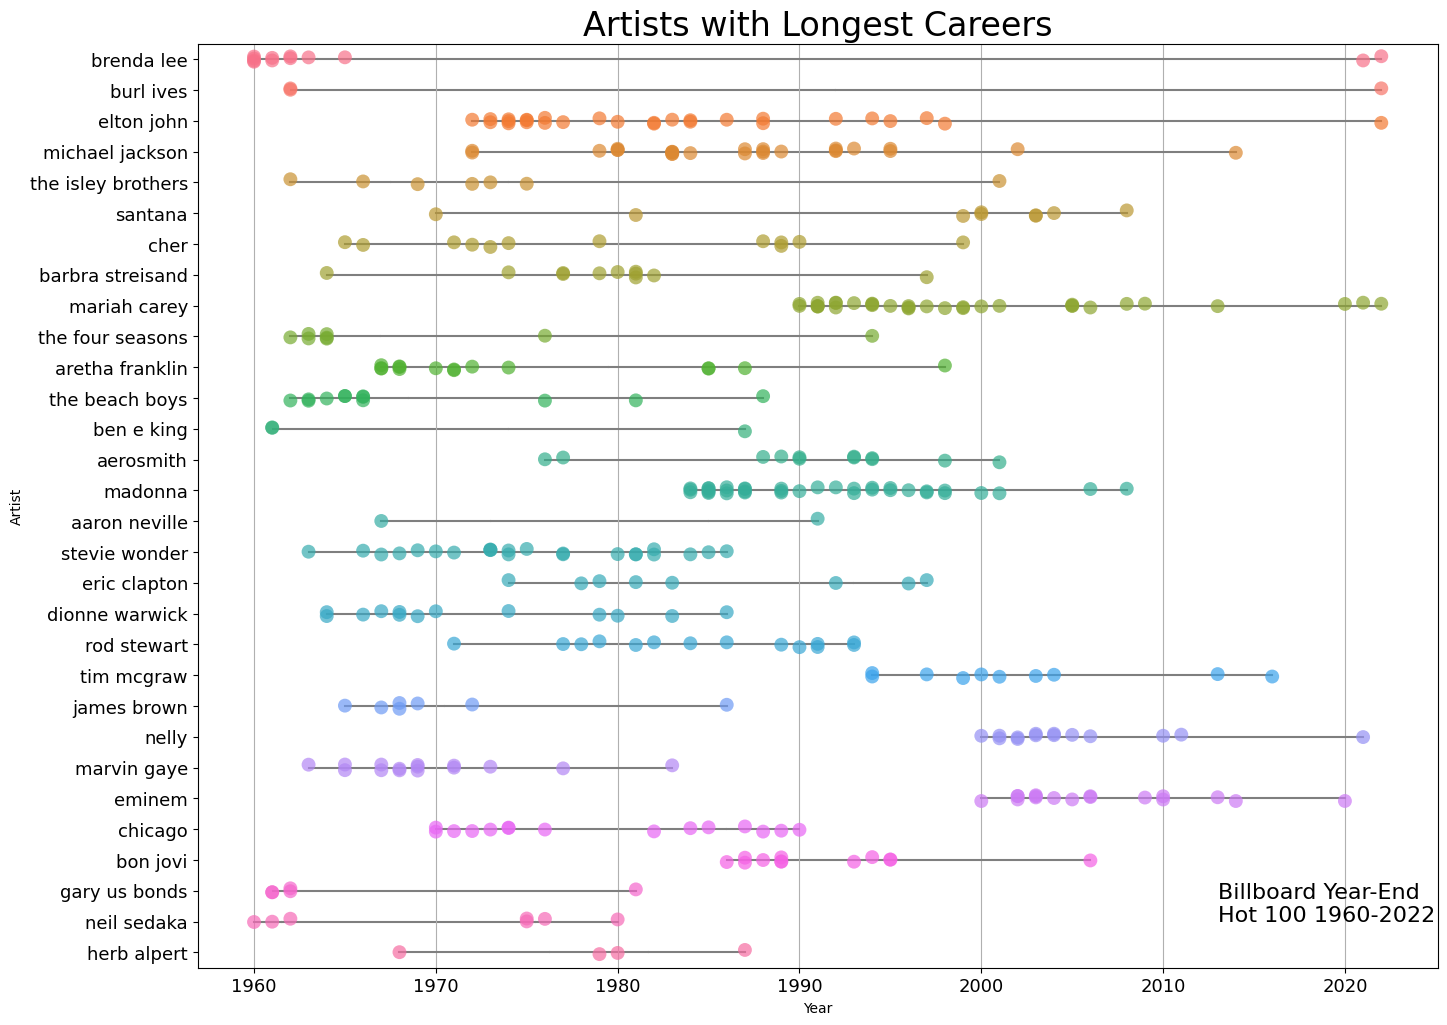

In [7]:
# plot timelines of hits for each artist, ordered by career spans
plt.figure(figsize=(16,12))
ax = sns.stripplot(data=timeless_df, x='year', y='artist_base', jitter=True, 
              order=longevity.index, size=10, alpha=0.7, palette= sns.color_palette("husl", 30))
sns.boxplot(data=timeless_df, x='year', y='artist_base', ax=ax, width=0, whis= 20,
            order=longevity.index, color='lightgray')
ax.xaxis.grid(True)
ax.set(ylabel='Artist', xlabel='Year')
ax.set_title('Artists with Longest Careers', fontsize=24)
ax.annotate('Billboard Year-End\nHot 100 1960-2022',
            xy=(2013,28), fontsize=16)

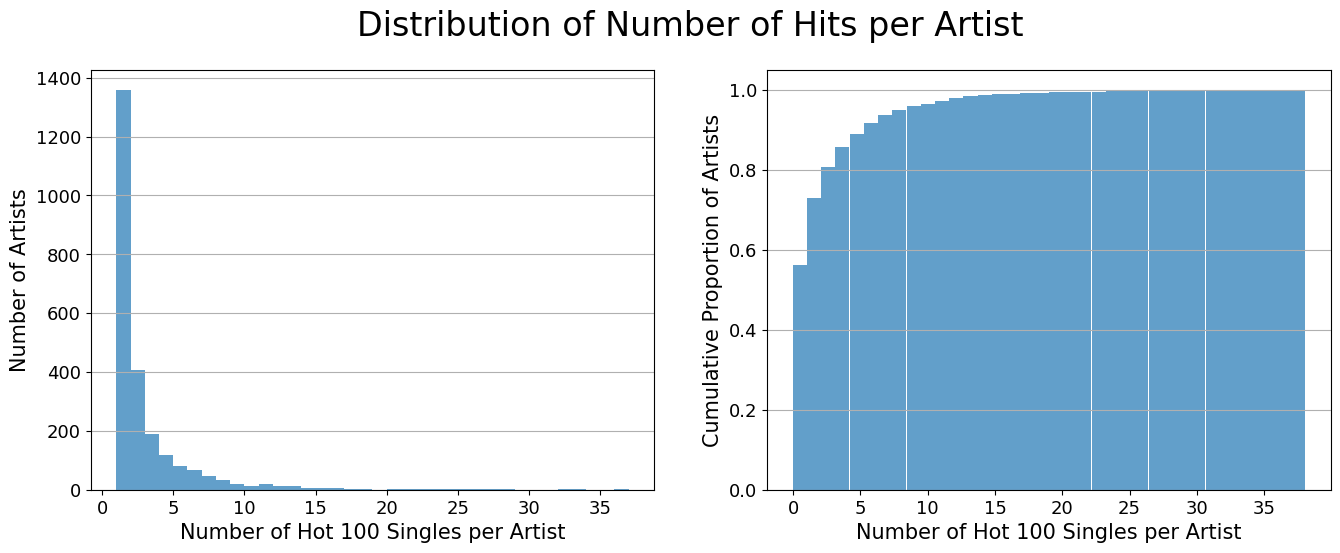

In [8]:
# generate subplots
axes = list()
plt.figure(figsize=(16,12))
grid_positions = [221, 222]
for position in grid_positions:
    axes.append(plt.subplot(position))

# generate upper left histogram
df['artist_base'].value_counts().plot.hist(bins=36, ax=axes[0], alpha=0.7)
axes[0].set_ylabel('Number of Artists', fontsize=15)

# generate upper right cumulative relative frequency histogram
counts = df['artist_base'].value_counts()
res = relfreq(counts, numbins=36)
x = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,
                                 res.frequency.size)
axes[1].bar(x, np.cumsum(res.frequency), width=res.binsize+0.02, alpha=0.7)
axes[1].set_ylabel('Cumulative Proportion of Artists', fontsize=15)

for ax in axes[:2]:
    ax.set_xlabel('Number of Hot 100 Singles per Artist', fontsize=15)
    ax.yaxis.grid(True)

plt.suptitle('Distribution of Number of Hits per Artist',
             fontsize=24, y=0.93);